# Street network bearings

Calculate street network bearings and visualize the spatial orientation of a street network.

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx/tree/master/examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)

In [1]:
import osmnx as ox, pandas as pd, matplotlib.pyplot as plt
%matplotlib inline
ox.config(log_console=True, use_cache=True)

### First, look at a non-grid street network

Moraga, California is a hilly suburb with winding loops and cul-de-sacs. We can see this lack of consistent orientation in its histogram of edge bearings.

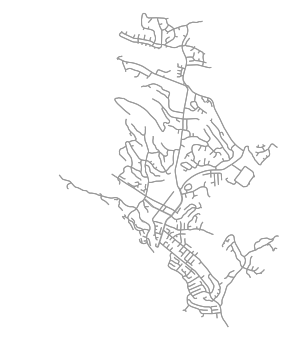

In [2]:
G = ox.graph_from_place('Moraga, California', network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

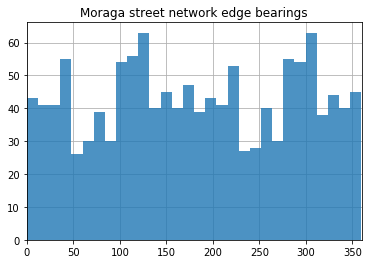

In [3]:
# calculate edge bearings and visualize their frequency
G = ox.add_edge_bearings(G)
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('Moraga street network edge bearings')
plt.show()

### Now look at a gridded street network

Santa Monica has an orthogonal grid characterized by four-way intersections. We can see this clear orientation in its histogram of edge bearings.

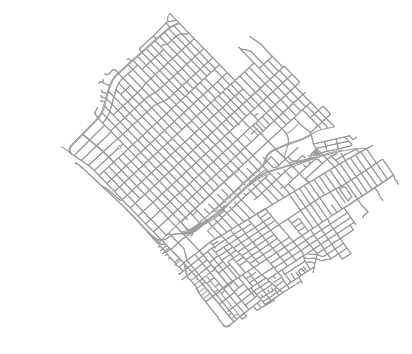

In [4]:
G = ox.graph_from_place('Santa Monica, California', network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

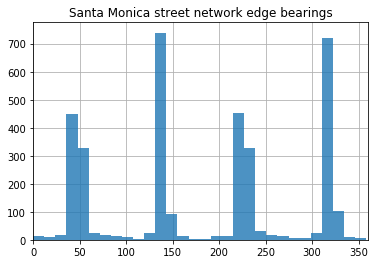

In [5]:
# calculate edge bearings and visualize their frequency
G = ox.add_edge_bearings(G)
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
ax.set_xlim(0, 360)
ax.set_title('Santa Monica street network edge bearings')
plt.show()